## Binary Classification with IMDB dataset

IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.
It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000) #only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded.

In [3]:
 train_data[0][:10] # lists of reviews; each review is a list of word indices (encoding a sequence of words).

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [4]:
train_labels[0]  #lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

1

In [5]:
#Because we’re restricting ourselves to the top 10,000 most frequent words, no word index will exceed 10,000
max([max(sequence) for sequence in train_data])

9999

In [6]:
#decoding reviews back to text
word_index = imdb.get_word_index() #word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])  #Reverses it, mapping integer indices to words
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])  #Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

####  Encoding the integer sequences via multi-hot encoding
Multi-hot encode the lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a Dense layer, capable of handling floating-point vector data, as the first layer in your model.

In [3]:
import numpy as np

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
          results[i, j] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [6]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building the model

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

### Compiling the Model

In [13]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [7]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
# Training the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 93ms/step - loss: 0.5263 - accuracy: 0.7840 - val_loss: 0.4037 - val_accuracy: 0.8623
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3306 - accuracy: 0.8929 - val_loss: 0.3167 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2462 - accuracy: 0.9164 - val_loss: 0.2872 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1979 - accuracy: 0.9339 - val_loss: 0.2851 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1642 - accuracy: 0.9463 - val_loss: 0.2759 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1392 - accuracy: 0.9561 - val_loss: 0.3130 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1177 - accuracy: 0.9636 - val_loss: 0.3018 - val_accuracy: 0.8813
Epoch 8/20
30

In [18]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the training and validation loss & Accuracy

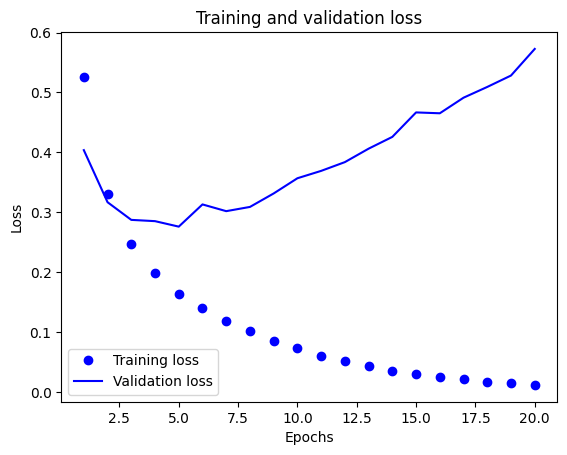

In [19]:
import matplotlib.pyplot as plt

#  Plotting the training and validation loss

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")   # "bo" is for "blue dot."
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # "b" is for "solid blue line."
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


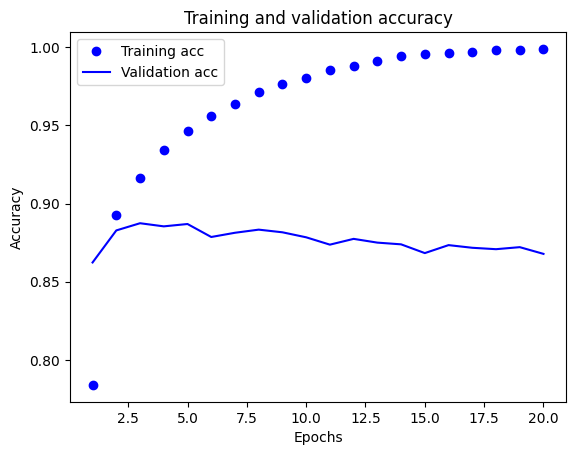

In [20]:
#  Plotting the training and validation accuracy

plt.clf()  # clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradientdescent optimization—the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of a
model that performs better on the training data but doesn't do well on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the fourth epoch, you’re overoptimizing on the training data, and you
end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

 In this case, to prevent overfitting, you could stop training after four epochs.

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [24]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [25]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4598 - accuracy: 0.8160
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2721 - accuracy: 0.9047
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2137 - accuracy: 0.9231
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2851 - accuracy: 0.8862


In [26]:
results

[0.28508350253105164, 0.8862400054931641]

This fairly naive approach achieves an accuracy of 88%. With state-of-the-art
approaches, you should be able to get close to 95%.


In [27]:
 # Using a trained model to generate predictions on new data

 model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.16777484],
       [0.999597  ],
       [0.74655765],
       ...,
       [0.10318659],
       [0.06968871],
       [0.6053267 ]], dtype=float32)

### Experimentations

#### Experimenting with number of representation layer

In [8]:
# Using one representation layer
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [10]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 29ms/step - loss: 0.4634 - accuracy: 0.8178
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2937 - accuracy: 0.9015
Epoch 3/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2386 - accuracy: 0.9166
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2776 - accuracy: 0.8902


In [11]:
results

[0.27763795852661133, 0.8902000188827515]

Using one representation layer had roughly the same result as using two layers

In [12]:
#Using three representation layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [13]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [14]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.4979 - accuracy: 0.7863
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2762 - accuracy: 0.8987
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2087 - accuracy: 0.9226
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3428 - accuracy: 0.8682


In [15]:
results

[0.34284329414367676, 0.8682000041007996]

Using three representation layers did worse when compared to the previous two.

#### Experimenting with layer units

In [7]:
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [8]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [9]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 21ms/step - loss: 0.4948 - accuracy: 0.8144
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.3037 - accuracy: 0.8977
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2352 - accuracy: 0.9178
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2788 - accuracy: 0.8890


In [10]:
results

[0.27882662415504456, 0.8890399932861328]

In [11]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [12]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [13]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4465 - accuracy: 0.8102
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2647 - accuracy: 0.9027
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2076 - accuracy: 0.9250
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3154 - accuracy: 0.8760


In [14]:
results

[0.3153660297393799, 0.876039981842041]

In [7]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [8]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [9]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 15ms/step - loss: 0.4528 - accuracy: 0.7915
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2669 - accuracy: 0.8950
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2116 - accuracy: 0.9203
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3225 - accuracy: 0.8742


In [10]:
results

[0.32246965169906616, 0.874239981174469]

Using less representation layer did roughly the same as 16, while using more than 16 performed less on test set.

#### Experimenting with  mse loss function

In [11]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [12]:
model.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["accuracy"]
)

In [13]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 6s 41ms/step - loss: 0.1630 - accuracy: 0.8076
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.0908 - accuracy: 0.8965
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0697 - accuracy: 0.9173
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.0844 - accuracy: 0.8862


In [14]:
results

[0.08442699164152145, 0.8862000107765198]

Using mse as the loss function gave a lesser loss score but roughly the same accuracy.

#### Experimenting with  tanh activation

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [8]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [9]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 16ms/step - loss: 0.4361 - accuracy: 0.8264
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2519 - accuracy: 0.9085
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1949 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3182 - accuracy: 0.8770


In [10]:
results

[0.31817421317100525, 0.8770400285720825]

Using tanh as the activation function did worse than when using relu as the activation function.